In [2]:
#pip install fitter

In [3]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions, get_distributions

In [4]:
#Daten einlesen
ablöseZone1 = pd.read_csv("/Users/Luca/Documents/Luca/Studium/Module/cwm1 - Steinschlagrisiko/out_1_getrennt.csv", sep=";")
ablöseZone2 = pd.read_csv("/Users/Luca/Documents/Luca/Studium/Module/cwm1 - Steinschlagrisiko/out_2_getrennt.csv", sep=";")

In [5]:
#Datum und Uhrzeit richtig formatieren und in eine Spalte
ablöseZone1["Datum/Zeit"] = pd.to_datetime(ablöseZone1["Datum"] + " " + ablöseZone1["Uhrzeit"], format='%d.%m.%Y %H:%M')
ablöseZone2["Datum/Zeit"] = pd.to_datetime(ablöseZone2["Date"]  + " " + ablöseZone2["Uhrzeit"], format='%d.%m.%Y %H:%M')
#Alte Datum und Uhrzeit Spalten löschen
ablöseZone1 = ablöseZone1.drop(["Datum", "Uhrzeit"], axis = 1)
ablöseZone2 = ablöseZone2.drop(["Date", "Uhrzeit"], axis = 1)
#Nach Datum sortieren, um nacher die Zeitunterschiede besser berechnen zu können
ablöseZone1.sort_values(by=["Datum/Zeit"])
ablöseZone2.sort_values(by=["Datum/Zeit"])

,m [kg],v [m/s],Datum/Zeit
0,38,45.4,2019-01-01 09:00:00
1,187,41.6,2019-01-03 06:00:00
2,36,44.6,2019-01-04 10:00:00
3,6,41.2,2019-01-07 14:00:00
4,65,39.6,2019-01-11 06:00:00
5,58,33.2,2019-01-11 16:00:00
6,365,40.2,2019-01-14 11:00:00
7,22,46.5,2019-01-16 02:00:00
8,146,36.2,2019-01-18 06:00:00
9,29,38.3,2019-01-19 17:00:00


In [6]:
#Die Zeit zwischen den Steinschlägen berechnen
#Ablösezone1
unterschiedeZone1 = []
for i in range(len(ablöseZone1)-1):
    unterschied = int(abs(ablöseZone1["Datum/Zeit"][i] - ablöseZone1["Datum/Zeit"][i+1]).total_seconds() / 3600)
    unterschiedeZone1.append(unterschied)
#Aus Array ein pandas-df machen damit man es plotten kann
dfunterschiedeZone1 = pd.DataFrame(unterschiedeZone1, columns=['Unterschiede'])

#Ablösezone2
unterschiedeZone2 = []
for i in range(len(ablöseZone2)-1):
    unterschied = int(abs(ablöseZone2["Datum/Zeit"][i] - ablöseZone2["Datum/Zeit"][i+1]).total_seconds() / 3600)
    unterschiedeZone2.append(unterschied)
#Aus Array ein df machen damit man es plotten kann
dfunterschiedeZone2 = pd.DataFrame(unterschiedeZone2, columns=['Unterschiede'])


Für die Montecarlosimulation braucht man die Verteilungen mit den dazugehörigen Parameter. Um ein Überblick zu bekommen über die Daten wurden als erstes Histogramme geplottet.

### Histogramme Geschwindigkeit

Text(0.5, 0, 'Gechwindigkeit in m/s')

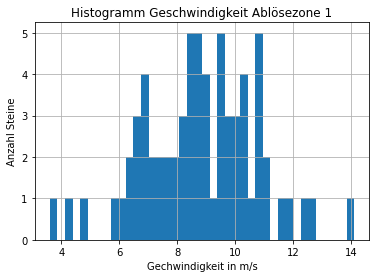

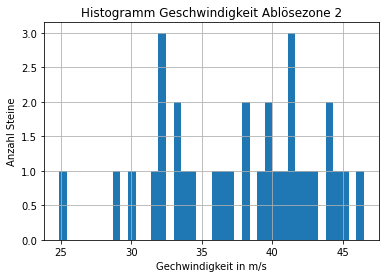

In [7]:
ablöseZone1.hist(column="v [m/s]", bins=40)
plt.title("Histogramm Geschwindigkeit Ablösezone 1")
plt.ylabel("Anzahl Steine")
plt.xlabel("Gechwindigkeit in m/s")

ablöseZone2.hist(column="v [m/s]", bins=40)
plt.title("Histogramm Geschwindigkeit Ablösezone 2")
plt.ylabel("Anzahl Steine")
plt.xlabel("Gechwindigkeit in m/s")

### Histogramme Masse

Text(0.5, 0, 'Masse in kg')

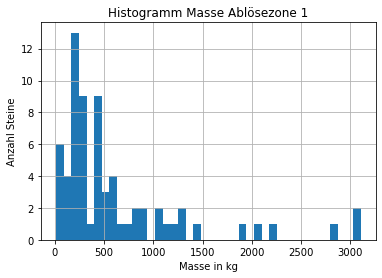

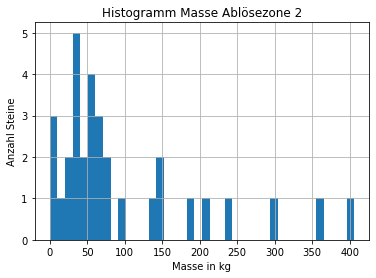

In [8]:
ablöseZone1.hist(column="m [kg]", bins=40)
plt.title("Histogramm Masse Ablösezone 1")
plt.ylabel("Anzahl Steine")
plt.xlabel("Masse in kg")

ablöseZone2.hist(column="m [kg]", bins=40)
plt.title("Histogramm Masse Ablösezone 2")
plt.ylabel("Anzahl Steine")
plt.xlabel("Masse in kg")

### Histogramme Unterschiede

Text(0.5, 0, 'Zeit in Stunden')

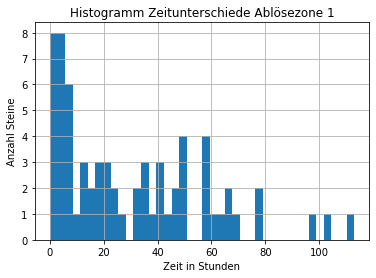

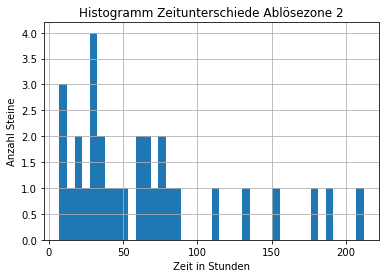

In [9]:
dfunterschiedeZone1.hist(column="Unterschiede", bins=40)
plt.title("Histogramm Zeitunterschiede Ablösezone 1")
plt.ylabel("Anzahl Steine")
plt.xlabel("Zeit in Stunden")

dfunterschiedeZone2.hist(column="Unterschiede", bins=40)
plt.title("Histogramm Zeitunterschiede Ablösezone 2")
plt.ylabel("Anzahl Steine")
plt.xlabel("Zeit in Stunden")

# Fitting

Anhand der Histogramme und Verteilungsfunktion kann man herausfinden welche Verteilung am besten dazu passt, diese Verteilungen und die jeweiligen Parameter braucht man um die Zufallsvariabeln zu bestimmen für die Simulation.
Dieses Vorgehen haben wir mit "Scipy" gemacht, wir haben zu erst über die Histogramme mit dem Befehl "get_common_distributions()" bekannte Verteilungen fitten lassen. Mit dem Befehl "get_best" haben wir die Verteilung bekommen die am besten dazu passt. ACHTUNG: Die "get_best" Funktion wurde mit der methode "sumsquare_error" erstellt, somit wird von allen Funktionen die Summe dieses "Square_error" gerechnet. Das heisst, dass die Funktion mit der kleinsten Summe als beste angesehen wird. Dies ist allerdings nicht immer richtig. Deshalb wurden nach dieser "get_best" Funktion die besten drei Verteilungen genommen und diese noch über die Verteilungsfunktion geplottet, so können wir visuell noch schauen welche von den 3 Verteilungen am besten zu der Verteilungsfunktion passt.

In [10]:
#Liste der common_distributions:
get_common_distributions()

['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform']

### Zone 1, Geschwindigkeit

#### Über Histogramme gefittet

{'norm': {'loc': 8.788235294117646, 'scale': 1.9745088303442118}}

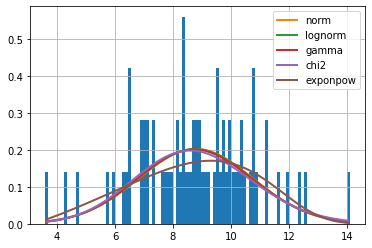

In [11]:
ablöseZone1FittedV = Fitter(ablöseZone1["v [m/s]"], distributions=get_common_distributions())
ablöseZone1FittedV.fit()
ablöseZone1FittedV.summary()
ablöseZone1FittedV.get_best(method = 'sumsquare_error')

#### Parameter für Top 3 Verteilungen bestimmen

In [12]:
zone1NormalVerteilungV = ablöseZone1FittedV.fitted_param["norm"]
zone1LognormVerteilungV = ablöseZone1FittedV.fitted_param["lognorm"]
zone1GammaVerteilungV = ablöseZone1FittedV.fitted_param["gamma"]

print(zone1NormalVerteilungV)
print(zone1LognormVerteilungV)
print(zone1GammaVerteilungV)

(8.788235294117646, 1.9745088303442118)
(0.0076789319250212, -247.89516201765224, 256.6759418651161)
(808.5274464534752, -47.62228137964149, 0.06977057532531764)


#### Top 3 Verteilungen über Verteilungsfunktion plotten

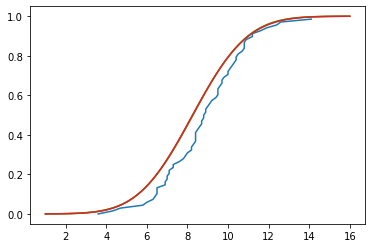

In [13]:
plt.plot(np.sort(ablöseZone1["v [m/s]"]), np.linspace(0, 1, len(ablöseZone1["v [m/s]"]), endpoint=False))

plt.plot(np.linspace(1,16,100), scipy.stats.norm.cdf(loc = zone1NormalVerteilungV[0], scale = zone1NormalVerteilungV[1], x = np.linspace(2,16,100)),label="norm")
plt.plot(np.linspace(1,16,100), scipy.stats.lognorm.cdf(s = zone1LognormVerteilungV[0], loc = zone1LognormVerteilungV[1], scale = zone1LognormVerteilungV[2], x = np.linspace(2,16,100)),label="lognorm")
plt.plot(np.linspace(1,16,100), scipy.stats.gamma.cdf(a = zone1GammaVerteilungV[0], loc = zone1GammaVerteilungV[1], scale = zone1GammaVerteilungV[2], x = np.linspace(2,16,100)),label="gamma")
plt.legend(loc="upper left")

#### Wir haben uns für "norm" entschieden

####  Zufallsvariable bestimmen

In [14]:
def calcRandomZone1V(num: int):
    return scipy.stats.norm.rvs(loc = zone1NormalVerteilungV[0], scale = zone1NormalVerteilungV[1], size = num)

### Zone 2, Geschwindigkeit

#### Über Histogramme gefittet

{'powerlaw': {'a': 1.6225211698026003,
  'loc': 24.037051269746893,
  'scale': 22.46294873394062}}

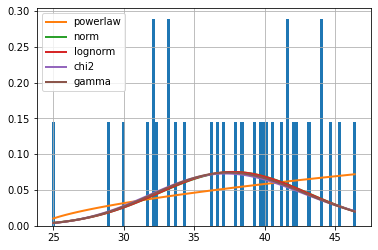

In [15]:
ablöseZone2FittedV = Fitter(ablöseZone2["v [m/s]"], distributions=get_common_distributions())
ablöseZone2FittedV.fit()
ablöseZone2FittedV.summary()
ablöseZone2FittedV.get_best(method = 'sumsquare_error')

#### Parameter für Top 3 Verteilungen bestimmen

In [16]:
zone2PowerlawVerteilungV = ablöseZone2FittedV.fitted_param["powerlaw"]
zone2NormalVerteilungV = ablöseZone2FittedV.fitted_param["norm"]
zone2LognormVerteilungV = ablöseZone2FittedV.fitted_param["lognorm"]

print(zone2PowerlawVerteilungV)
print(zone2NormalVerteilungV)
print(zone2LognormVerteilungV)

(1.6225211698026003, 24.037051269746893, 22.46294873394062)
(37.790625, 5.31080027956004)
(0.006164831706586592, -822.1618461572732, 859.9351997321913)


#### Top 3 Verteilungen über Verteilungsfunktion plotten

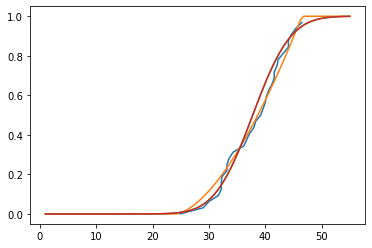

In [17]:
plt.plot(np.sort(ablöseZone2["v [m/s]"]), np.linspace(0, 1, len(ablöseZone2["v [m/s]"]), endpoint=False))
plt.plot(np.linspace(1,55,100), scipy.stats.powerlaw.cdf(a = zone2PowerlawVerteilungV[0], loc = zone2PowerlawVerteilungV[1], scale = zone2PowerlawVerteilungV[2], x = np.linspace(1,55,100)),label="powerlaw")
plt.plot(np.linspace(1,55,100), scipy.stats.norm.cdf(loc = zone2NormalVerteilungV[0], scale = zone2NormalVerteilungV[1], x = np.linspace(1,55,100)),label="norm")
plt.plot(np.linspace(1,55,100), scipy.stats.lognorm.cdf(s = zone2LognormVerteilungV[0], loc = zone2LognormVerteilungV[1], scale = zone2LognormVerteilungV[2], x = np.linspace(1,55,100)),label="lognrom")
plt.legend(loc="upper left")

#### Wir haben uns für "norm" entschieden

####  Zufallsvariable bestimmen

In [18]:
def calcRandomZone2V(num: int):
    return scipy.stats.norm.rvs(loc = zone2NormalVerteilungV[0], scale = zone2NormalVerteilungV[1], size = num)

### Zone 1, Masse

#### Über Histogramme gefittet

{'cauchy': {'loc': 313.1732540199847, 'scale': 188.98367020559948}}

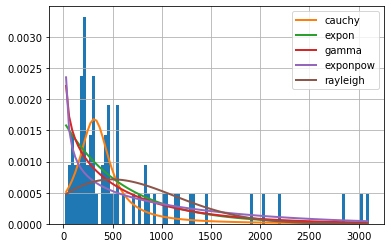

In [19]:
ablöseZone1FittedM = Fitter(ablöseZone1["m [kg]"], distributions=get_common_distributions())
ablöseZone1FittedM.fit()
ablöseZone1FittedM.summary()
ablöseZone1FittedM.get_best(method = 'sumsquare_error')

#### Parameter für Top 3 Verteilungen bestimmen

In [20]:
zone1CauchyVerteilungM = ablöseZone1FittedM.fitted_param["cauchy"]
zone1ExponVerteilungM = ablöseZone1FittedM.fitted_param["expon"]
zone1GammaVerteilungM = ablöseZone1FittedM.fitted_param["gamma"]

print(zone1CauchyVerteilungM)
print(zone1ExponVerteilungM)
print(zone1GammaVerteilungM)

(313.1732540199847, 188.98367020559948)
(12.0, 616.6323529411765)
(0.8079614675149851, 11.999999999999998, 822.0119854583972)


#### Top 3 Verteilungen über Verteilungsfunktion plotten

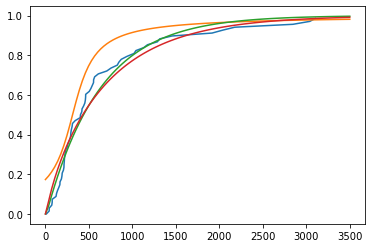

In [21]:
plt.plot(np.sort(ablöseZone1["m [kg]"]), np.linspace(0, 1, len(ablöseZone1["m [kg]"]), endpoint=False))
plt.plot(np.linspace(1,3500,100), scipy.stats.cauchy.cdf(loc = zone1CauchyVerteilungM[0], scale = zone1CauchyVerteilungM[1], x = np.linspace(1,3500,100)),label="cauchy")
plt.plot(np.linspace(1,3500,100), scipy.stats.expon.cdf(loc = zone1ExponVerteilungM[0], scale = zone1ExponVerteilungM[1], x = np.linspace(1,3500,100)),label="expon")
plt.plot(np.linspace(1,3500,100), scipy.stats.gamma.cdf(a = zone1GammaVerteilungM[0], loc = zone1GammaVerteilungM[1], scale = zone1GammaVerteilungM[2], x = np.linspace(1,3500,100)),label="gamma")
plt.legend(loc="lower right")

#### Wir haben uns für "expon" entschieden

####  Zufallsvariable bestimmen

In [22]:
def calcRandomZone1M(num: int):
    return scipy.stats.expon.rvs(loc = zone1ExponVerteilungM[0], scale = zone1ExponVerteilungM[1], size = num)

### Zone 2, Masse

#### Über Histogramme gefittet

{'cauchy': {'loc': 51.02159521968939, 'scale': 27.34050279860369}}

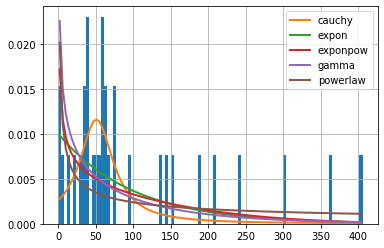

In [23]:
ablöseZone2FittedM = Fitter(ablöseZone2["m [kg]"], distributions=get_common_distributions())
ablöseZone2FittedM.fit()
ablöseZone2FittedM.summary()
ablöseZone2FittedM.get_best(method = 'sumsquare_error')

#### Parameter für Top 3 Verteilungen bestimmen

In [24]:
zone2CauchyVerteilungM = ablöseZone2FittedM.fitted_param["cauchy"]
zone2ExponVerteilungM = ablöseZone2FittedM.fitted_param["expon"]
zone2ExponpowVerteilungM = ablöseZone2FittedM.fitted_param["exponpow"]

print(zone2CauchyVerteilungM)
print(zone2ExponVerteilungM)
print(zone2ExponpowVerteilungM)

(51.02159521968939, 27.34050279860369)
(0.0, 99.25)
(0.6497663356842298, -1.7465628286524913e-26, 182.1745249367213)


#### Top 3 Verteilungen über Verteilungsfunktion plotten

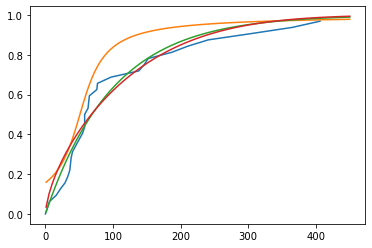

In [25]:
plt.plot(np.sort(ablöseZone2["m [kg]"]), np.linspace(0, 1, len(ablöseZone2["m [kg]"]), endpoint=False))
plt.plot(np.linspace(1,450,100), scipy.stats.cauchy.cdf(loc = zone2CauchyVerteilungM[0], scale = zone2CauchyVerteilungM[1], x = np.linspace(1,450,100)),label="cauchy")
plt.plot(np.linspace(1,450,100), scipy.stats.expon.cdf(loc = zone2ExponVerteilungM[0], scale = zone2ExponVerteilungM[1], x = np.linspace(1,450,100)),label="expon")
plt.plot(np.linspace(1,450,100), scipy.stats.exponpow.cdf(b = zone2ExponpowVerteilungM[0], loc = zone2ExponpowVerteilungM[1], scale = zone2ExponpowVerteilungM[2], x = np.linspace(1,450,100)),label="exponpow")
plt.legend(loc="lower right")

#### Wir haben uns für "expon" entschieden

####  Zufallsvariable bestimmen

In [26]:
def calcRandomZone2M(num: int):
    return scipy.stats.expon.rvs(loc = zone2ExponVerteilungM[0], scale = zone2ExponVerteilungM[1], size = num)

### Zone 1, Unterschiede

#### Über Histogramme gefittet

{'gamma': {'a': 0.7720943018929209,
  'loc': -2.1070777126863917e-25,
  'scale': 32.180388904581854}}

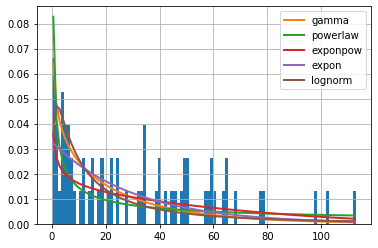

In [27]:
ablöseZone1FittedU = Fitter(dfunterschiedeZone1["Unterschiede"], distributions=get_common_distributions())
ablöseZone1FittedU.fit()
ablöseZone1FittedU.summary()
ablöseZone1FittedU.get_best(method = 'sumsquare_error')

#### Parameter für Top 3 Verteilungen bestimmen

In [28]:
zone1GammaVerteilungU = ablöseZone1FittedU.fitted_param["gamma"]
zone1PowerlawVerteilungU = ablöseZone1FittedU.fitted_param["powerlaw"]
zone1ExponpowVerteilungU = ablöseZone1FittedU.fitted_param["exponpow"]
zone1ExponVerteilungU = ablöseZone1FittedU.fitted_param["expon"]

print(zone1GammaVerteilungU)
print(zone1PowerlawVerteilungU)
print(zone1ExponpowVerteilungU)
print(zone1ExponVerteilungU)

(0.7720943018929209, -2.1070777126863917e-25, 32.180388904581854)
(0.3924871862674937, -3.0192940445763056e-26, 127.86206239315683)
(0.7320420996293464, -1.1723466185172852e-28, 75.92813464722244)
(0.0, 30.55223880597015)


#### Top 3 Verteilungen über Verteilungsfunktion plotten

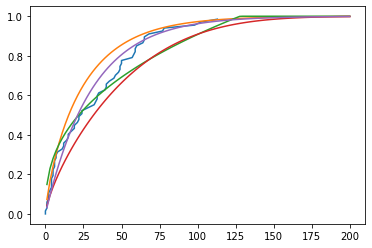

In [29]:
plt.plot(np.sort(dfunterschiedeZone1["Unterschiede"]), np.linspace(0, 1, len(dfunterschiedeZone1["Unterschiede"]), endpoint=False))
plt.plot(np.linspace(1,200,100), scipy.stats.gamma.cdf(a = zone1GammaVerteilungU[0], loc = zone1GammaVerteilungU[1], scale = zone1GammaVerteilungU[2], x = np.linspace(1,200,100)),label="gamma")
plt.plot(np.linspace(1,200,100), scipy.stats.powerlaw.cdf(a = zone1PowerlawVerteilungU[0], loc =  zone1PowerlawVerteilungU[1], scale = zone1PowerlawVerteilungU[2], x = np.linspace(1,200,100)),label="powerlaw")
plt.plot(np.linspace(1,200,100), scipy.stats.exponpow.cdf(b = zone1ExponpowVerteilungU[0], loc = zone1ExponpowVerteilungU[1], scale = zone1ExponpowVerteilungU[2], x = np.linspace(1,200,100)),label="exponpow")
plt.plot(np.linspace(1,200,100), scipy.stats.expon.cdf(loc = zone1ExponVerteilungU[0], scale = zone1ExponVerteilungU[1], x = np.linspace(1,200,100)),label="expon")
plt.legend(loc="lower right")

#### Wir haben uns für "expon" entschieden

####  Zufallsvariable bestimmen

In [30]:
def calcRandomZone1U(num: int):
    return scipy.stats.expon.rvs(loc = zone1ExponVerteilungU[0], scale = zone1ExponVerteilungU[1], size = num)

### Zone 2, Unterschiede

#### Über Histogramme gefittet

{'exponpow': {'b': 0.6971027846624209,
  'loc': 6.999999999999998,
  'scale': 117.24076623954022}}

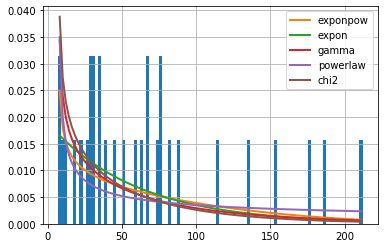

In [31]:
ablöseZone2FittedU = Fitter(dfunterschiedeZone2["Unterschiede"], distributions=get_common_distributions())
ablöseZone2FittedU.fit()
ablöseZone2FittedU.summary()
ablöseZone2FittedU.get_best(method = 'sumsquare_error')

#### Parameter für Top 3 Verteilungen bestimmen

In [32]:
zone2GammaVerteilungU = ablöseZone2FittedU.fitted_param["exponpow"]
zone2PowerlawVerteilungU = ablöseZone2FittedU.fitted_param["expon"]
zone2ExponpowVerteilungU = ablöseZone2FittedU.fitted_param["gamma"]

print(zone2GammaVerteilungU)
print(zone2PowerlawVerteilungU)
print(zone2ExponpowVerteilungU)

(0.6971027846624209, 6.999999999999998, 117.24076623954022)
(7.0, 59.322580645161295)
(0.6924339239082432, 6.999999999999999, 85.33142881264439)


#### Top 3 Verteilungen über Verteilungsfunktion plotten

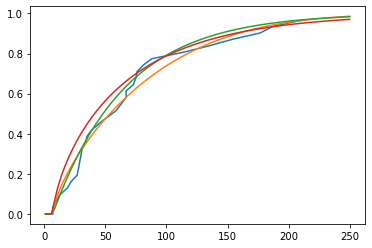

In [33]:
plt.plot(np.sort(dfunterschiedeZone2["Unterschiede"]), np.linspace(0, 1, len(dfunterschiedeZone2["Unterschiede"]), endpoint=False))
plt.plot(np.linspace(1,250,100), scipy.stats.exponpow.cdf(b = zone2GammaVerteilungU[0], loc = zone2GammaVerteilungU[1], scale = zone2GammaVerteilungU[2], x = np.linspace(1,250,100)),label="gamma")
plt.plot(np.linspace(1,250,100), scipy.stats.expon.cdf(loc = zone2PowerlawVerteilungU[0], scale = zone2PowerlawVerteilungU[1], x = np.linspace(1,250,100)),label="powerlaw")
plt.plot(np.linspace(1,250,100), scipy.stats.gamma.cdf(a = zone2ExponpowVerteilungU[0], loc = zone2ExponpowVerteilungU[1], scale = zone2ExponpowVerteilungU[2], x = np.linspace(1,250,100)),label="exponpow")
plt.legend(loc="lower right")

#### Wir haben uns für "exponpow" entschieden

####  Zufallsvariable bestimmen

In [34]:
def calcRandomZone2U(num: int):
    return scipy.stats.exponpow.rvs(b = zone2GammaVerteilungU[0], loc = zone2GammaVerteilungU[1], scale = zone2GammaVerteilungU[2], size = num)

# Monte-Carlo Simulation

In [35]:
#Monte Carlo Simulation
def monteCarlo(simulationslängeJahre: int, calcRandomU: callable, calcRandomM: callable, calcRandomV: callable) -> (int, int, list): 
    simulationslänge = simulationslängeJahre * 24 * 365
    
    netzReisser = 0
    zeitReisser = []
    steineImNetz = 0
    stunde = 0
    steine = 0
    i = 0
    randomUList = calcRandomU(simulationslänge)
    randomMList = calcRandomM(simulationslänge)
    randomVList = calcRandomV(simulationslänge)

    while simulationslänge > 0:
        i += 1

        zeitUnterschied = randomUList[i]
        simulationslänge -= zeitUnterschied
        stunde += zeitUnterschied

        randomM = randomMList[i]
        randomV = randomVList[i]

        potentielleEnergie = (0.5 * randomM * (randomV**2)) / 1000
        steine += 1

        #Netz reisst sicher
        if potentielleEnergie > 1000 \
            or zeitUnterschied < 24 and steineImNetz > 2000 and potentielleEnergie > 500:
            netzReisser += 1
            zeitReisser.append(stunde)
            steineImNetz = 0
        #Netz reisst nicht, Netz ist geräumt
        elif zeitUnterschied > 24 and potentielleEnergie < 1000:
            steineImNetz = randomM
        #Netz reisst nicht --> 
        # im Netz sind > 2000 kg --> poteng < 500kJ:
        # Netz sind < 2000 kg --> poteng < 1000kJ:
        elif zeitUnterschied < 24 and steineImNetz > 2000 and potentielleEnergie < 500 \
            or zeitUnterschied < 24 and steineImNetz < 2000 and potentielleEnergie < 1000:
            steineImNetz += randomM
    
    return (steine, netzReisser, zeitReisser)

In [88]:
#zone1 = monteCarlo(24 * 365 * 10000, calcRandomZone1U, calcRandomZone1M, calcRandomZone1V)
simulationsLängeJahre = 100000

zone1 = monteCarlo(simulationsLängeJahre, calcRandomZone1U, calcRandomZone1M, calcRandomZone1V)
zone2 = monteCarlo(simulationsLängeJahre, calcRandomZone2U, calcRandomZone2M, calcRandomZone2V)

print("Anzahl Steinschläge Ablösezone 1:", zone1[0])
print("Anzahl Netzreisser Ablösezone 1:", zone1[1])
print("Zeitpunkte wann das Netz gerissen ist Ablösezone 1 (In Stunden):", zone1[2])
print("Anzahl Steinschläge Ablösezone 2:", zone2[0])
print("Anzahl Netzreisser Ablösezone 2:", zone2[1])
print("Zeitpunkte wann das Netz gerissen ist Ablösezone 2 (In Stunden):", zone2[2])

Anzahl Steinschläge Ablösezone 1: 28676903
Anzahl Netzreisser Ablösezone 1: 26
Zeitpunkte wann das Netz gerissen ist Ablösezone 1 (In Stunden): [97932804.4177451, 104406465.71897012, 109353120.22600079, 126970078.26733816, 149477126.9006855, 172604589.5811492, 211594406.19132146, 266436331.6325965, 325870286.62593806, 331378107.0955101, 374497945.38988453, 410359098.9221356, 425023385.73580956, 487888856.1268642, 502478809.0159445, 511039738.29999083, 527032323.565908, 545273715.7769591, 643643308.8952086, 645360160.7405312, 667347364.3050585, 727308697.2052046, 776547229.4187902, 800301234.5139296, 857828982.1067436, 872650905.7017379]
Anzahl Steinschläge Ablösezone 2: 12263380
Anzahl Netzreisser Ablösezone 2: 243
Zeitpunkte wann das Netz gerissen ist Ablösezone 2 (In Stunden): [160537.94469103214, 1058037.9407706393, 5798080.272615491, 7476217.549404706, 11547155.637215134, 15406433.00669253, 31817854.350294255, 33700084.609821394, 34182259.06860227, 34888629.82741074, 35470631.67212

array([[<AxesSubplot:title={'center':'uhrzeit'}>]], dtype=object)

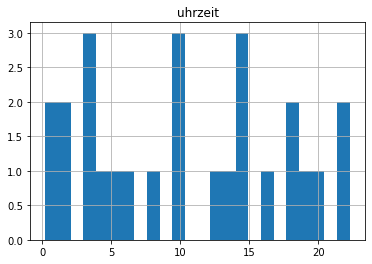

In [89]:
#Kontrollieren ob die Netzreisser eine Abhängigkeit haben mit der Uhrzeit haben
uhrzeitZone1 = []
for i in range(len(zone1[2])):
    uhrzeitZone1.append(zone1[2][i]%24)
    
dfUhrzeitZone1 = pd.DataFrame(uhrzeitZone1, columns=['uhrzeit'])
dfUhrzeitZone1.hist(column="uhrzeit", bins=24)

array([[<AxesSubplot:title={'center':'uhrzeit'}>]], dtype=object)

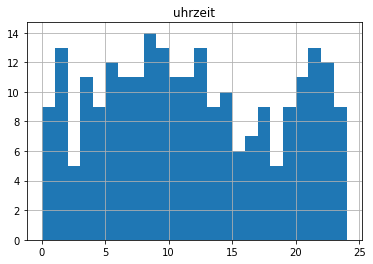

In [90]:
uhrzeitZone2 = []
for i in range(len(zone2[2])):
    uhrzeitZone2.append(zone2[2][i]%24)
    
dfUhrzeitZone2 = pd.DataFrame(uhrzeitZone2, columns=['uhrzeit'])
dfUhrzeitZone2.hist(column="uhrzeit", bins=24)

Wie man anhand der Hisogramme erkennen kann, besteht kein Zusammenhang zwischen wann das Netz gerissen ist und die Uhrzeit. Somit spielt die Verteilung der Autos keine Rolle. Deshalb werden die 1200 Auto gleichmässig über den Tag verteilt.

In [91]:
zeitpunktAuto = []
auto = 0
while auto < 24:
    zeitpunktAuto.append(auto)
    auto = round(auto + 0.02, 2)

Annahme Strasse (Skizze):
Strassenlänge 600m:
Anfang = 0m
Ablösezone 1 = 200m
Ablösezone 2 = 400m
Ende = 600m

Annahme: Wenn man mit 60 km/h (16.67 m/s) gegen ein Stein fährt stirbt man mit einer Wahrscheinlichkeit von 5% (Siehe Bericht) <br>
Reaktionszeit = 1sek (Quelle: ) <br>
<br>
Quelle für Bremszeit und Bremsweg: <br>
https://www.johannes-strommer.com/formeln/weg-geschwindigkeit-beschleunigung-zeit/ <br>
Bremsweg = 1sek * 16.67m/s = 16.67m <br>

Da wir für beide Ablösezonen eine Liste haben mit dem Zeitpunkt (In Stunden) wann die Netze gerissen sagen, können wir 3 Aussagen betätigen: <br>
- Befindet sich das Auto über Meter 183.33 und unter Meter 200 im Zeitintervall [(ZeitpunktpunktreisserZone1 - 1sek) bis (ZeitpunktreisserZone1)] schafft das Auto es nicht mehr zu bremsen und somit wird es zu mit einer Wahrscheinlichkeit von 5% ein Todesfall.
- Befindet sich das Auto über Meter 383.33 und unter Meter 400 im Zeitintervall [(ZeitpunktpunktreisserZone2 - 1sek) bis (ZeitpunktreisserZone2)] wird es ein Totesfall.
- Befindet sich das Auto genau unter dem Stein (Todeszone = 2m) wird es zu 100% ein Todesfall.

In [92]:
safeZoneZone1 = 183.33
safeZoneZone2 = 383.33
geschwindigkeit = 16.67

In [93]:
toteZone1 = 0
for a in uhrzeitZone1:
    for b in zeitpunktAuto:
        if b + ((safeZoneZone1/geschwindigkeit)/60/60) > a - 1/60/60 and b + ((safeZoneZone1/geschwindigkeit)/60/60) < a - 0.12/60/60:
            toteZone1 = toteZone1 + (1 * 0.05)
        elif b + ((safeZoneZone1/geschwindigkeit)/60/60) >= a - 0.12/60/60 and b + ((safeZoneZone1/geschwindigkeit)/60/60) <= a:
            toteZone1 = toteZone + 1
toteZone2 = 0
for a in uhrzeitZone2:
    for b in zeitpunktAuto:
        if b + ((safeZoneZone2/geschwindigkeit)/60/60) > a - 1/60/60 and b + ((safeZoneZone2/geschwindigkeit)/60/60) < a - 0.12/60/60:
            toteZone2 = toteZone2 + (1 * 0.05)
        elif b + ((safeZoneZone2/geschwindigkeit)/60/60) >= a - 0.12/60/60 and b + ((safeZoneZone2/geschwindigkeit)/60/60) <= a:
            toteZone2 = toteZone + 1

In [94]:
print("Anzahl Tote in Ablösezone 1:", toteZone1 * 0.05)
print("Anzahl Tote in Ablösezone 2:", toteZone2 * 0.05)

Anzahl Tote in Ablösezone 1: 0.0
Anzahl Tote in Ablösezone 2: 0.0075000000000000015
